# Aprendizaje Supervisado: Laboratorio 1

## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.

Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train). Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

In [6]:
# cargar datos de entrenamiento y evaluación
import pandas as pd

train = pd.read_csv('datasets/lab1/ej1_train.csv')
X_train = train.iloc[:, :-1]
Y_train = train['TARGET']
test = pd.read_csv('datasets/lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
Y_test = test['TARGET']

### Ejercicio 1a:

Primero imprima una descripción básica de los datos.

Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?

Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?


In [59]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


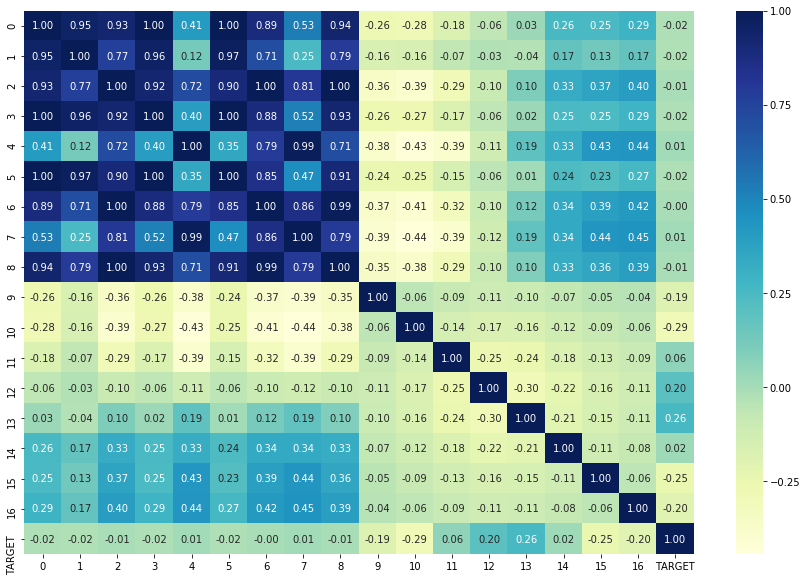

In [122]:
# COMPLETAR: calcular y graficar correlación entre features
# AYUDA: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

train_corr = train.corr() 

plt.figure(figsize=(15,10))
seaborn.heatmap(train_corr, cmap="YlGnBu", annot=True, fmt=".2f")

plt.show()

Podemos observar que los fatures se distribuyen en 2 grandes grupos. Por un lado los features booleanos (de la columna 9 a la 16), vemos que estan muy poco relacionados entre sí, y tampoco parece tener mucha relación con la clase. Por otro lado, los features numéricos (de la columna 0 a la 8), podemos ver que están muy relacionados entre sí. De hecho hay columnas que son totalmente dependientes (por ejemplo las columnas 0, 3 y 5 tienen la misma información). De estas columnas podemos ver que todas salvo la 4 y la 7 contienen prácticamente la misma información. 

Todas estas columnas parecen no tener correlación con la clase.

In [123]:
# COMPLETAR: reducir dimensionalidad y graficar
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_train)

PC_df = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])

PC_df['TARGET'] = Y_train

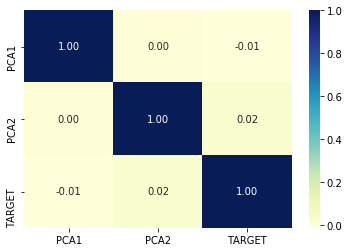

In [124]:
PC_df_corr = PC_df.corr() 

plt.figure(figsize=(6,4))
seaborn.heatmap(PC_df_corr, cmap="YlGnBu", annot=True, fmt=".2f")

plt.show()

Reducimos la dimensión de los datos a través de PCA, encontrando las 2 componentes principales. Lo primero que se observa es que estas 2 dimensiones están muy poco correlacionadas con la clase. 

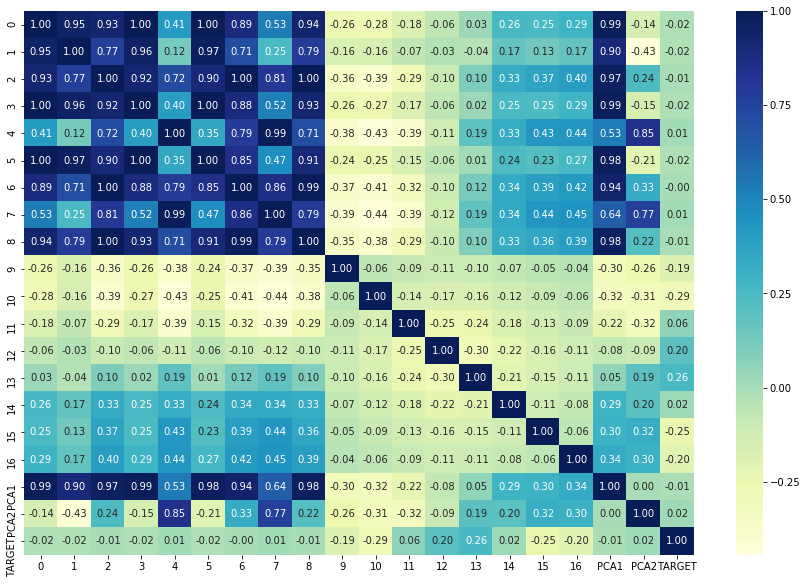

In [126]:
result = pd.concat([X_train, PC_df], axis=1, sort=False)
result_corr = result.corr() 

plt.figure(figsize=(15,10))
seaborn.heatmap(result_corr, cmap="YlGnBu", annot=True, fmt=".2f")

plt.show()

Al analizar estas 2 componentes con relación a todos los features, podemos ver que la primer componente retiene la información de las columnas 0, 1, 2, 3, 5, 6 y 8 principalmente, mientras que la segunda componente, principalmente retiene la información de las columnas 4 y 7.

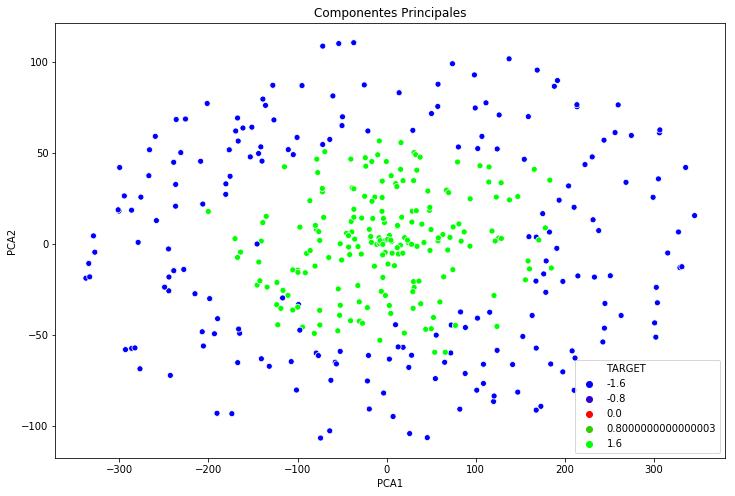

In [115]:
plt.figure(figsize=(12,8))
seaborn.scatterplot(x="PCA1", y="PCA2", hue="TARGET", palette="brg", data=result)

plt.title('Componentes Principales')
plt.show()

Cuando graficamos las 2 componentes principales, con la clase asociada, podemos ver que los datos tienen una distribución gausiana, por lo tanto podría ser apropiado utilizar un kernel gausiano para SVM.

### Ejercico 1b:

Primero calcule la accuracy sobre train para una SVM con kernel lineal.

**Preguntas:**
- ¿Cuál es la accuracy?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique la SVM para lograr una accuracy en train de 1.0.

In [127]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
clf = LinearSVC(random_state=0)  # CAMBIAR!
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 0.6125


Sobre los datos de entrenamiento, se tiene un *accuracy* de 0.61, un valor muy bajo para el problema en sí. El problema que se presenta no es un problema de sesgo o varianza, sino que está planteado mal el modelo. Por lo que pudimos ver con PCA, los datos no se separan linealmente por lo que un SVM lineal es una mala solución.

In [128]:
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 1.0


Cuando utilizamos el kernel RBF (Radial Basis Function), se logra un ajuste perfecto a los datos de entrenamiento.

### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.

**Preguntas:**
- ¿Cuál es la accuracy en test?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9.
La accuracy en train puede ser menos de 1.0.

Puede buscar los valores apropiados a mano o usar grid search.

In [137]:
clf = SVC(random_state=0)  # CAMBIAR!
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Accuracy en train:	 1.0
Accuracy en test:	 0.7


Con el modelo entrenado anteriormente se logra un *accuracy* de 0.7 para los datos de *test*, lo cual hace sugerir que el modelo está sobreajustando a los datos de entrenamiento, y con ello se tiene mucha consideración a la varianza de los datos. 

In [165]:
from sklearn.model_selection import GridSearchCV
import numpy as np

exploring_params = {
    'gamma': np.logspace(-4, 2, 7),  
    'C': np.logspace(-2, 4, 7)
}

m = SVC(random_state=0)
model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
model.fit(X_train, Y_train)

print("Mejor conjunto de hiperparámetros:")
print(model.best_params_, end="\n\n")

Y_pred = model.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = model.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Mejor conjunto de hiperparámetros:
{'C': 1000.0, 'gamma': 0.0001}

Accuracy en train:	 0.95
Accuracy en test:	 0.91


Modificando la penalización al error (variable C) y el radio de influencia (variable *gamma*), podemos lograr un modelo que generaliza mejor, obteniendo *accuracy* de 0.95 para los datos de entrenamiento y de 0.91 para los datos de test.

## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de 0.8294.


### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [7]:
# cargar los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
del train['PassengerId']  # eliminar ids

# COMPLETAR: eliminar las columnas que no tienen números, y las que tienen datos incompletos.
train = train.dropna(how='any', axis=1)
del train['Name']
del train['Sex']
del train['Ticket']

In [9]:
# entrenar la misma Random Forest, e imprimir el out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7172


### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

**Responda**: ¿Cuál de las tres mejoras aporta más?

In [11]:
# cargar nuevamente los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
# COMPLETAR: completar con el valor medio los datos faltantes en el campo Age
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [16]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
train = train.dropna(how='any', axis=1)
del train['Name']
del train['Sex']
del train['Ticket']
del train['PassengerId']

In [18]:
# entrenar el Random Forest, e imprimir out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7250


In [20]:
# cargar nuevamente los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')

In [21]:
# COMPLETAR: agregar columna con el largo del nombre
train['name_lon'] = train['Name'].apply(lambda x: len(x))

In [22]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
train = train.dropna(how='any', axis=1)
del train['Name']
del train['Sex']
del train['Ticket']
del train['PassengerId']

In [23]:
# entrenar el Random Forest, e imprimir out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7407


In [24]:
# cargar nuevamente los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')

In [29]:
# COMPLETAR: poner 1 en lugar de 'female' y 0 en lugar de 'male'
# AYUDA: DEFINIR LA FUNCIÓN f Y HACER:
# train['Sex'] = train['Sex'].apply(f)

def f(x):
    if x == 'female':
        return 1
    elif x == 'male':
        return 0
    else:
        return x

train['Sex'] = train['Sex'].apply(lambda x: f(x))

In [30]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
train = train.dropna(how='any', axis=1)
del train['Name']
del train['Ticket']
del train['PassengerId']

In [31]:
# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# entrenar el Random Forest, e imprimir out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8025


Podemos ver que el OOB score para las mejoras de completar la edad, utilizar el largo del nombre y incluir la variable sexo del pasajero es de 0.725, 0.7407 y 0.8025 respectivamente. Por lo que la mejora que más aporta es la de considerar el sexo del pasajero.

Por último consideramos todas las mejoras a la vez y vemos que score tenemos:

In [33]:
# cargar nuevamente los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')

# COMPLETAR: completar con el valor medio los datos faltantes en el campo Age
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['name_lon'] = train['Name'].apply(lambda x: len(x))
train['Sex'] = train['Sex'].apply(lambda x: f(x))

# COMPLETAR: eliminar las columnas que deban ser eliminadas
train = train.dropna(how='any', axis=1)
del train['Name']
del train['Ticket']
del train['PassengerId']

# entrenar el Random Forest, e imprimir out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8339


El índice de OOB aumenta al considerar todas las mejoras, lo que podría decirnos que las 3 mejoras aportan información diferente y relevante para el problema, por lo que sería prudente considerar todas esas variables. 